Linear Regression Results:
MSE: 0.11987823370584064
R² Score: 0.9634226398605744

Random Forest Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


K-Means Clustering Results:
Silhouette Score: 0.551191604619592
Cluster Labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


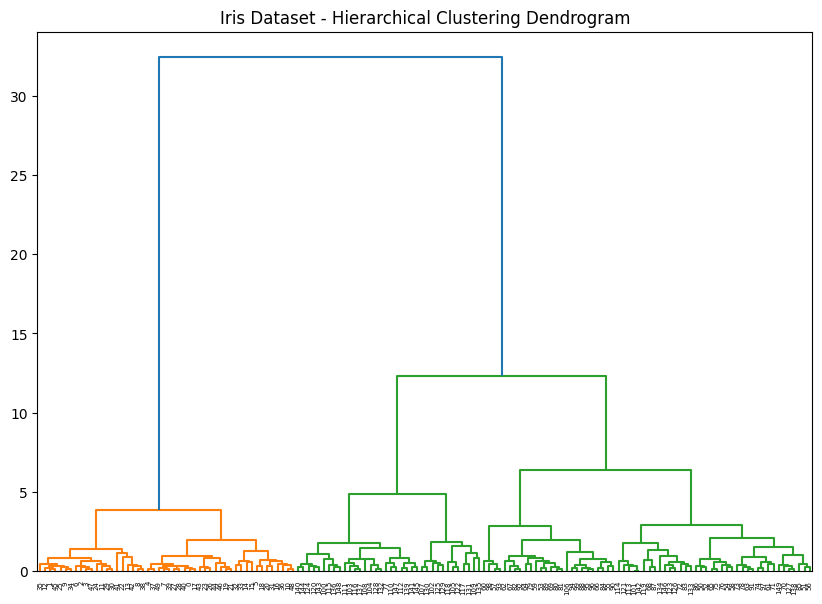


Q-Table after Training:
[[20. 18. 18. 18.]
 [18. 20. 18. 18.]
 [18. 18. 20. 18.]]


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, mean_squared_error, r2_score,
                             classification_report, silhouette_score, confusion_matrix)

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
import random

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['species'] = y

# ---------------------- LINEAR REGRESSION (Predict Petal Length) -----------------------
X_lr = df.drop('petal length (cm)', axis=1)  # All features except 'petal length'
y_lr = df['petal length (cm)']

X_train, X_test, y_train, y_test = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression Results:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))

# ---------------------- RANDOM FOREST (Classify Species) -----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# ---------------------- K-MEANS CLUSTERING -----------------------
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

print("\nK-Means Clustering Results:")
print("Silhouette Score:", silhouette_score(X, clusters))
print("Cluster Labels:", clusters)

# ---------------------- HIERARCHICAL CLUSTERING -----------------------
plt.figure(figsize=(10, 7))
plt.title("Iris Dataset - Hierarchical Clustering Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()

# ---------------------- Q-LEARNING -----------------------
# Initialize Q-Table (3 states for species and 4 actions for features)
q_table = np.zeros((3, 4))
learning_rate = 0.1
discount_factor = 0.95
episodes = 1000
actions = list(range(4))  # Feature indices as actions

for episode in range(episodes):
    state = random.choice([0, 1, 2])  # Randomly choose a species as the initial state
    for _ in range(100):  # Maximum steps per episode
        action = random.choice(actions)
        reward = 1 if state == action else -1  # Simple reward: +1 for correct guess, -1 otherwise
        # Q-value update
        q_table[state, action] = q_table[state, action] + learning_rate * (
            reward + discount_factor * np.max(q_table[state]) - q_table[state, action]
        )

print("\nQ-Table after Training:")
print(q_table)
